<a href="https://colab.research.google.com/github/yehorn0/obr_zobr_3/blob/master/lab6/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 6**
Based on https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html
1.   Scaling up / down
2.   Translation
3.   Rotation

TBD:
4. Affine Transformation
5. Perspective Transformation


Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from io import BytesIO

##1. Scaling up/down


In [4]:
def read_image_from_bytes(image_bytes):
    # Convert bytes to numpy array
    nparr = np.frombuffer(image_bytes, np.uint8)
    # Decode image
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

Upload file

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dog.104.jpg to dog.104.jpg


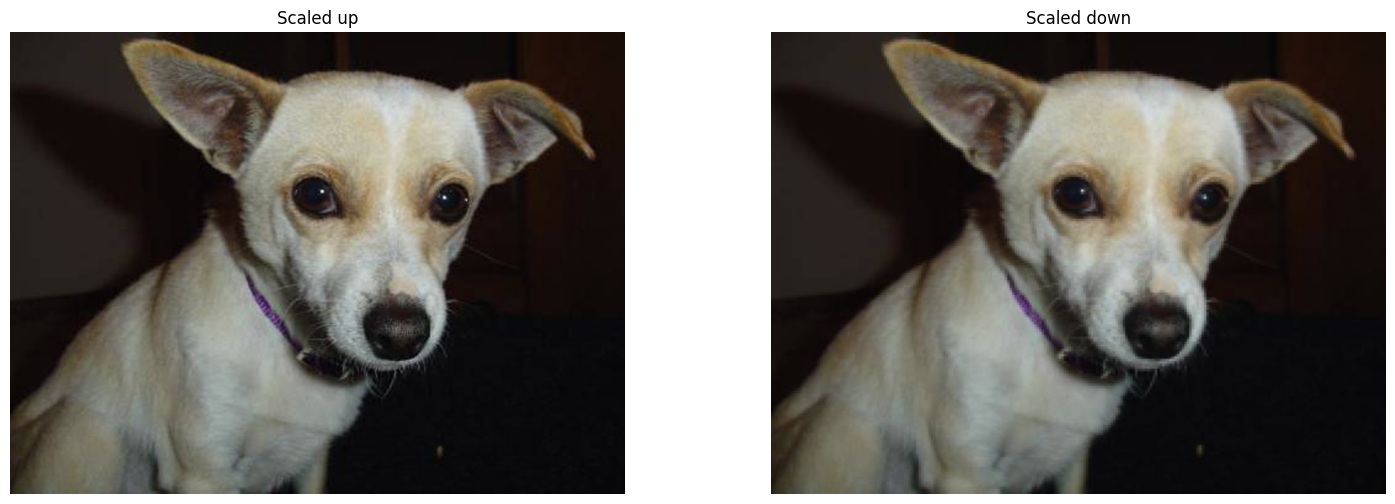

In [9]:
for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])

  scaled_up = cv2.resize(im, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
  scaled_down = cv2.resize(im, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

  plt.figure(figsize=(18, 6))

  # Original image
  """
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Original")
  """
  # Scaled up
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(scaled_up, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Scaled up")

  # Scaled down
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(scaled_down, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Scaled down")


##2. Translation

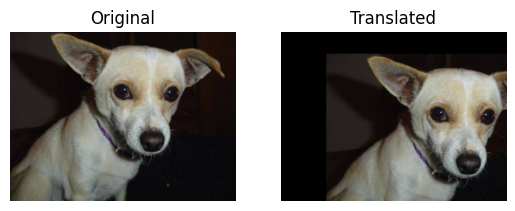

In [12]:
for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])
  rows, cols, num_channels = im.shape

  M = np.float32([[1,0,100],[0,1,50]])
  dst = cv2.warpAffine(im, M, (cols,rows))

  # Original image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Original")

  # Scaled up
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Translated")


## 3. Rotation

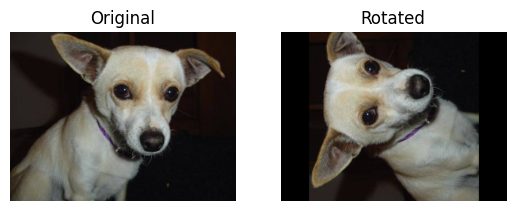

In [14]:
for img_key in uploaded:
  im = read_image_from_bytes(uploaded[img_key])
  rows, cols, num_channels = im.shape

  M = cv2.getRotationMatrix2D(
      (
          (cols-1)/2.0,
           (rows-1)/2.0
      ),
      90,
      1
  )
  dst = cv2.warpAffine(im, M, (cols,rows))

  # Original image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Original")

  # Scaled up
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.title("Rotated")